#INTRO
This is part 2/3 and is brief in its statistical 
exploration of the stock price data set as a univariate time series

In [0]:
from pandas_datareader import data as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
start_date = '2014-01-01'
end_date = '2019-01-05'

In [0]:
def getTicks(items):
  symbols = []
  for i in items: 
    try:
      data = dr.get_data_yahoo(i, start_date, end_date)
    except Exception as e:
      print("there was a problem with {}".format(i))
    else:
      symbols.append(i)
  return symbols

Final from Part 1

In [0]:
sample_ticks = [
            'MGNX','IRWD', 'SGEN', 'NRC', 'BMRN'                
]

In [0]:
adj = getTicks(sample_ticks)

there was a problem with BMRN


#Load Data

In [0]:
df = dr.get_data_yahoo(adj, start_date, end_date)
prices = df.loc[:,('Adj Close',slice(None))]

If you are unfamiliar with Multi Indexing of Columns, it is good to recall that droplevel(0), the desired column level here will give us a normally indexed data frame

In [0]:
prices.columns = prices.columns.droplevel(0)

In [0]:
from statsmodels.tsa.stattools import pacf,acf

In [0]:
p = prices.copy()

In [0]:
p.head()

Symbols,MGNX,IRWD,SGEN,NRC
Date,,,,
2014-01-02,28.830000,10.175879,40.180000,16.320044
2014-01-03,29.480000,10.075377,39.240002,16.055538
2014-01-06,29.309999,9.656616,38.570000,16.575735
2014-01-07,31.530001,9.572865,40.000000,16.390579
2014-01-08,32.259998,10.242881,41.040001,15.632327


Let's Graph MGNX

Text(0.5, 1.0, 'MGNX')

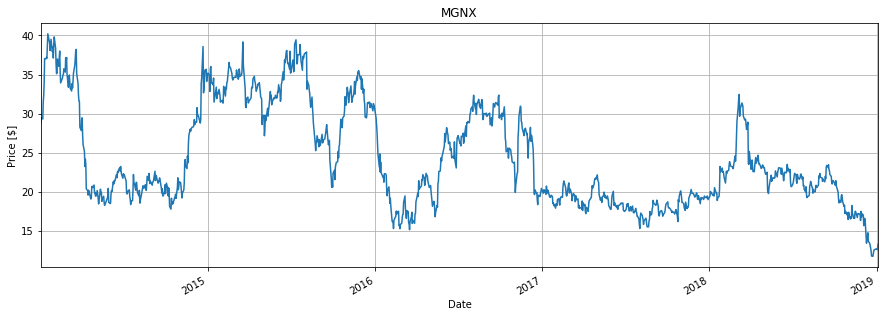

In [0]:
plt.figure(figsize=(15,5))
p.MGNX.plot(grid=True)
plt.ylabel('Price [$]')
plt.title('MGNX')

In [0]:
from statsmodels.graphics import tsaplots

Remember=> Positive Lags mean Stickiness, and Negative Lags mean Swings in Sequential Price Movements.
As a side note, time series may contain seasonality if lag variables show patterns in multiples.

Correlation is a good property of time series. It means there is more information with which we can improve our forecast.

AC can be used to detect seasonality in the original time series and following the forecast, it can be used to detect if there is any remaining information in the residual series. PACF serves a similar purpose, ultimately telling us the number of significant lags in the lagged data set.

The Following Graphs Below explore the AutoCorrelation and Partial AutoCorrelation Test Method at different lags. In the AC graph below with 30 lags, each of the 30 lag variables are statistically significant. As such, there is significant correlation between lags and the original time series. Note that more distant lags diminish in significance. 

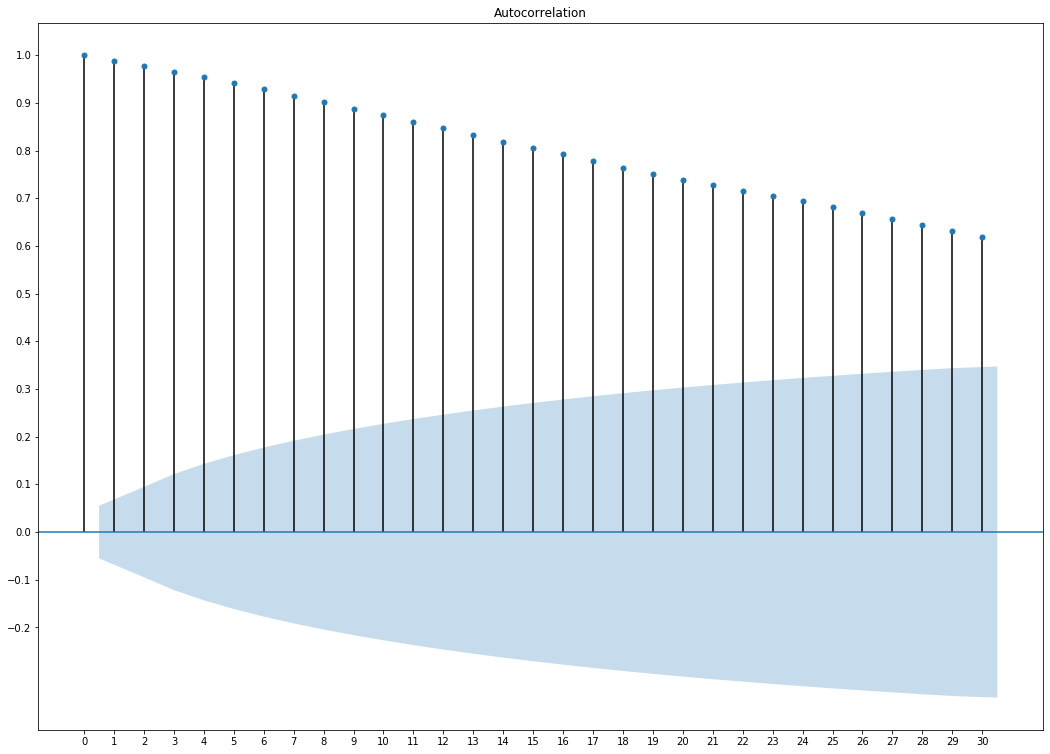

In [0]:
# values falling outside of the blue shaded region(confidence interval) are considered stat significant

plt.rcParams['figure.figsize'] = [18,13]
acf = tsaplots.plot_acf(p.MGNX,lags=30)
plt.yticks(np.arange(-.2, 1.1, step=0.1))
plt.xticks(np.arange(0, 31, step=1))
plt.show()
# NOTE: the blue shaded area is a measure of confidence
# stat significance falls outside of ci

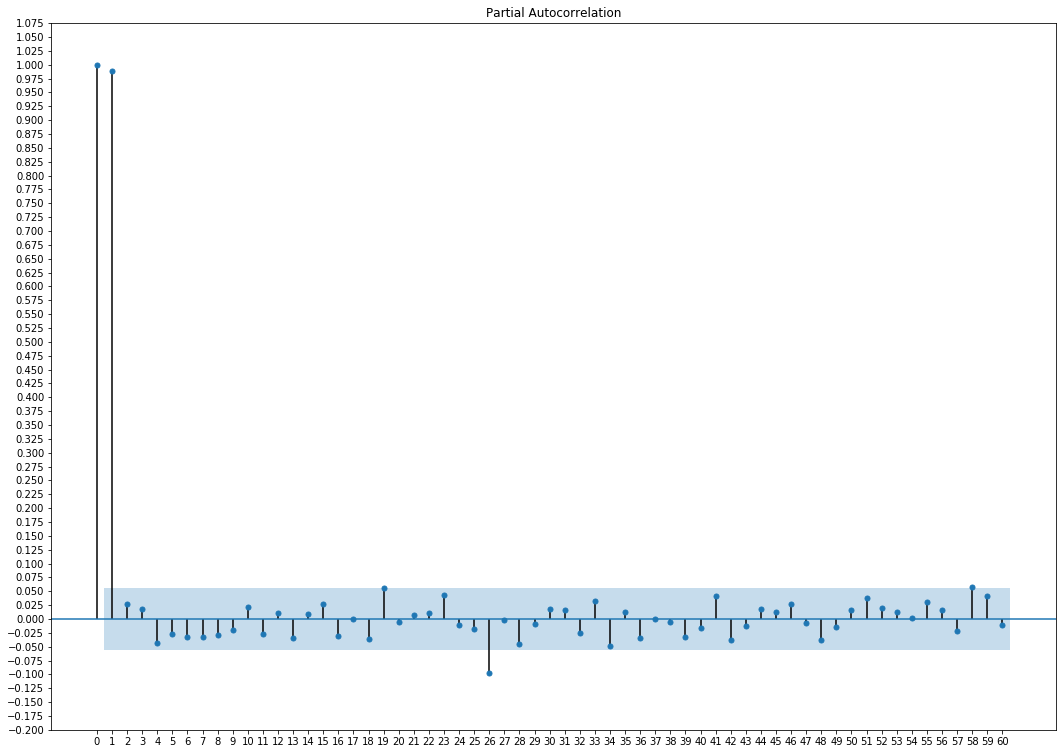

In [0]:
# 60 lags on pacf
plt.rcParams['figure.figsize'] = [18,13]
pacf1 = tsaplots.plot_pacf(p.MGNX,lags=60)

plt.yticks(np.arange(-.2, 1.1, step=0.025))
plt.xticks(np.arange(0, 61, step=1))
plt.show()

The PACF graph w/ 60 lags above tells us we only need 2 lag variables, which are considered to be stat significant.

In [0]:
pac1 = tsaplots.pacf(p.MGNX,nlags=60)
pac1[pac1 >= .025]

array([1.        , 0.98861361, 0.02625226, 0.0262918 , 0.0565369 ,
       0.04305028, 0.03260578, 0.04131204, 0.0265652 , 0.03834485,
       0.03129626, 0.05773971, 0.04052567])

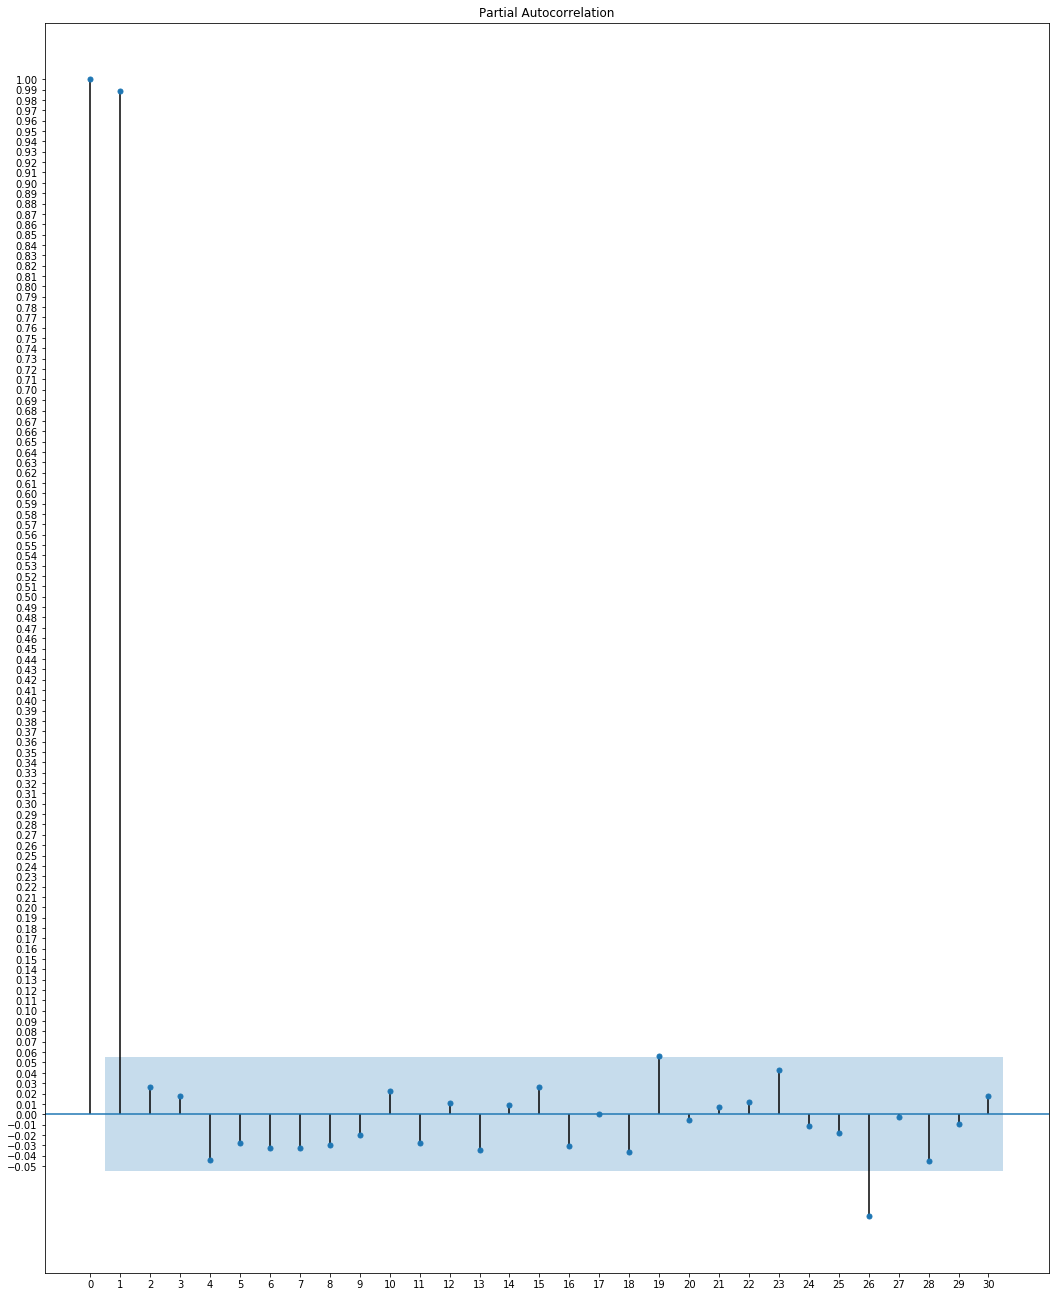

In [0]:
# 30 lags on pacf
plt.rcParams['figure.figsize'] = [18,23]
pacf2= tsaplots.plot_pacf(p.MGNX,lags=30)

plt.yticks(np.arange(-.05, 1.01, step=0.01))
plt.xticks(np.arange(0, 31, step=1))
plt.show()
# 3 stat sign lags w/ only 2 neighboring lags

In [0]:
pac2 = tsaplots.pacf(p.MGNX,nlags=30)
pac2[pac2 >= .025]

array([1.        , 0.98861361, 0.02625226, 0.0262918 , 0.0565369 ,
       0.04305028])

253 lags/or 1 year of lags for the PACF graph below still gives us 2 sig lags

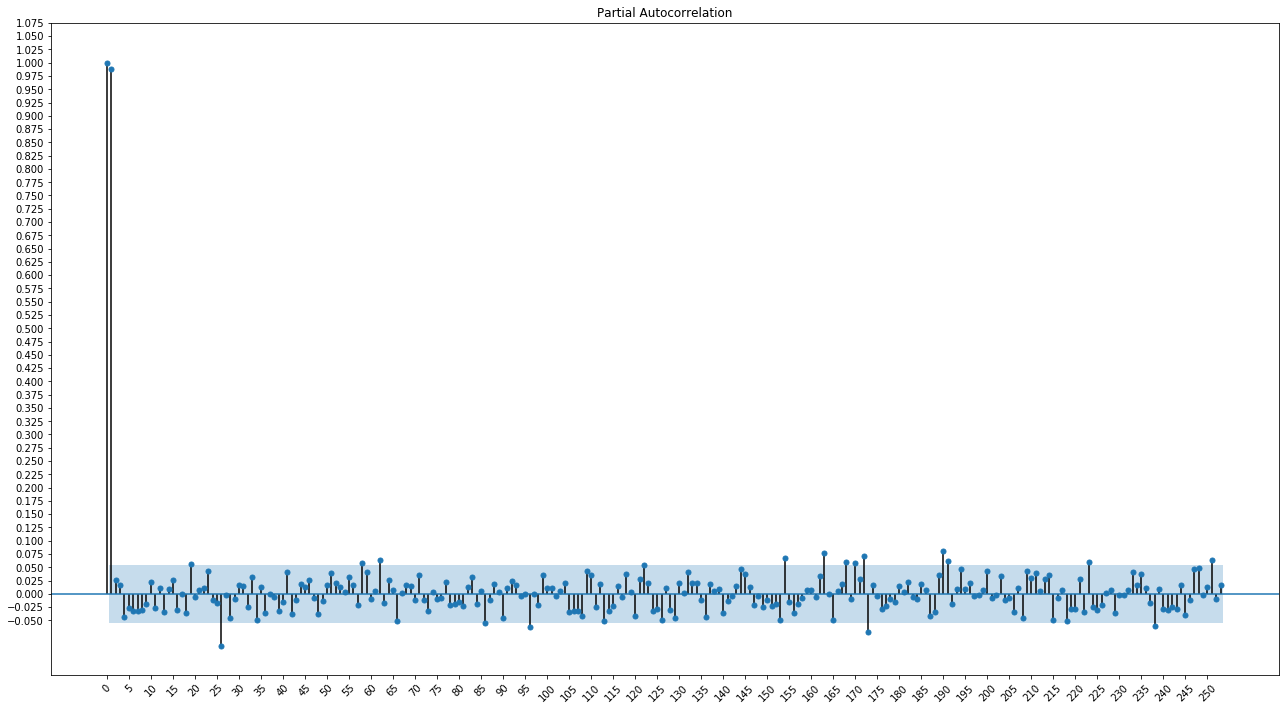

In [0]:
plt.rcParams['figure.figsize'] = [22,12]

pacf3 = tsaplots.plot_pacf(p.MGNX,lags=253)
plt.yticks(np.arange(-.05, 1.1, step=0.025))
plt.xticks(np.arange(0, 253, step=5),rotation='45')
plt.show()

In some cases the PACF is preferred for a quick solution to the number of lags used in forecasting. Increasing the number of recommended lags in a pacf may improve your result. it may also reduce computational efficiency.

In [0]:
pac3 = tsaplots.pacf(p.MGNX,nlags=253)
pac3[pac3 >= .025]

array([1.        , 0.98861361, 0.02625226, 0.0262918 , 0.0565369 ,
       0.04305028, 0.03260578, 0.04131204, 0.0265652 , 0.03834485,
       0.03129626, 0.05773971, 0.04052567, 0.06303473, 0.02696551,
       0.03568395, 0.03187681, 0.03483707, 0.04330886, 0.03453723,
       0.03818068, 0.02800658, 0.05439092, 0.04040251, 0.04711415,
       0.03651228, 0.06838897, 0.03338515, 0.07732127, 0.06081748,
       0.0588634 , 0.02777028, 0.07122278, 0.03498061, 0.080959  ,
       0.06090024, 0.04734077, 0.04347385, 0.03369598, 0.043786  ,
       0.02936865, 0.03920672, 0.02700656, 0.03538737, 0.02823729,
       0.05989622, 0.0415948 , 0.03657347, 0.04651608, 0.04827493,
       0.06441177])

##Checking Stationarity with Dickey Fuller

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. If you recall our previous graph of MGNX, there are several trends both positive and negative. Our inspection of the ACF plot indicates a violation of the property for a stationary process. The lags in the ACF plot are not fixed. We can assume that there several properties of a stationary violated and perform a Dickey Fuller test with a statsmodels import. 
We will assert the null hypothesis to be that our MGNX time series is non-stationary and if ADF stat > Critical Value, we will fail to reject.

The question is what should we do in the case that our time series is non-stationary or we fail to reject the null hypothesis? The popular technique and solution is DIFFERENCE. An example of this technique will be provided.  

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
res = adfuller(p.MGNX)
print('ADF Stat: %f' % res[0])
print('p-val: %f' % res[1])
print('Critical Values:')
for key,value in res[4].items():
  print('\t%s: %.3f' % (key,value))

if res[0] < res[4] ['5%']:
  print('Reject Ho - Time Series is Stationary')
else:
  print('Fail to Reject Ho - Time Series is Non-Stationary')

ADF Stat: -2.279175
p-val: 0.178772
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Fail to Reject Ho - Time Series is Non-Stationary


Since our Time Series is Non-Stationary according to DF test, here is an Example of Differencing.

In [0]:
p.MGNX[:10]

Date
2014-01-02    28.830000
2014-01-03    29.480000
2014-01-06    29.309999
2014-01-07    31.530001
2014-01-08    32.259998
2014-01-09    33.919998
2014-01-10    37.029999
2014-01-13    37.000000
2014-01-14    37.189999
2014-01-15    37.070000
Name: MGNX, dtype: float64

In [0]:
# what is happening with the difference? t2 - t1
diff = p.MGNX.diff()

In [0]:
diff[:10]

Date
2014-01-02         NaN
2014-01-03    0.650000
2014-01-06   -0.170000
2014-01-07    2.220001
2014-01-08    0.729998
2014-01-09    1.660000
2014-01-10    3.110001
2014-01-13   -0.029999
2014-01-14    0.189999
2014-01-15   -0.119999
Name: MGNX, dtype: float64

Text(0.5, 1.0, 'Diff MGNX')

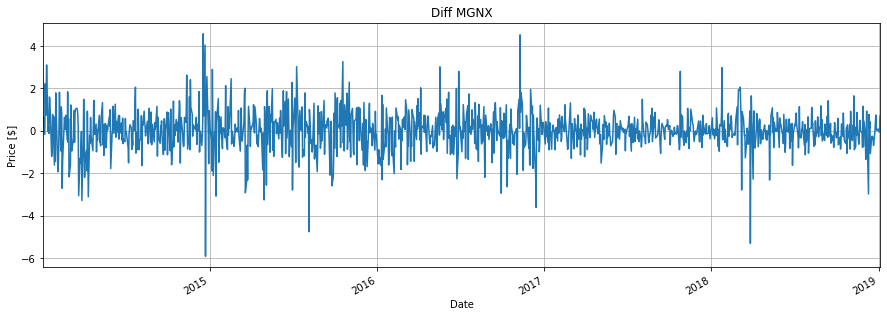

In [0]:
plt.figure(figsize=(15,5))
diff.plot(grid=True)
plt.ylabel('Price [$]')
plt.title('Diff MGNX')

#Statistics with T Tests on MGNX and Tickers with Neighboring Sortino Ratios (MGNX, IRWD, SGEN, NRC, BMRN)

In [0]:
p.head()

Symbols,MGNX,IRWD,SGEN,NRC,BMRN
Date,,,,,
2014-01-02,28.830000,10.175879,40.180000,16.320044,69.269997
2014-01-03,29.480000,10.075377,39.240002,16.055538,69.089996
2014-01-06,29.309999,9.656616,38.570000,16.575735,67.099998
2014-01-07,31.530001,9.572865,40.000000,16.390579,68.540001
2014-01-08,32.259998,10.242881,41.040001,15.632327,69.790001


In [0]:
from scipy import stats

Null Hypothesis: The expectation of MGNX and IRWD prices are identical

In [0]:
stats.ttest_ind(p.MGNX, p.IRWD)

Ttest_indResult(statistic=64.30519106028764, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01. 

Null Hyp: The expectation of MGNX and SGEN prices are identical

In [0]:
stats.ttest_ind(p.MGNX, p.SGEN)

Ttest_indResult(statistic=-64.27189520900016, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01.

Null Hyp: The expectation of MGNX and NRC prices are identical

In [0]:
stats.ttest_ind(p.MGNX, p.NRC)

Ttest_indResult(statistic=12.538479260615116, pvalue=4.99087594029554e-35)

Reject the Null Hypothesis with p < 0.01. 

Null Hyp: The expectation of MGNX and BMRN prices are identical

In [0]:
stats.ttest_ind(p.MGNX, p.BMRN)

Ttest_indResult(statistic=-125.54418524107258, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01. 

Summary: 
Since the p value for all tickers were the same with an outcome to reject the null, the results could be useful as evidence in our pursuit to use these tickers as predictors in a standard regression, depending on our response variable.

## Conclusion of Exploration:
The exploration up to this point has given us a clear indication that our time series are trendy, and highly correlated. From our ACF to our Dickey Fuller tests, we should be sure to make proper modifications to detrend before modeling. Since the Auto Arima model in the statsmodels package contains p,d,q parameters it will be easy to make these modifications.
Overall the exploration has given us an idea of what to expect before we proceed to the modeling phase. We need not worry about any other properties of time series. We have covered normality, trend, and autocorrelation. We have also covered lag importance. 